In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

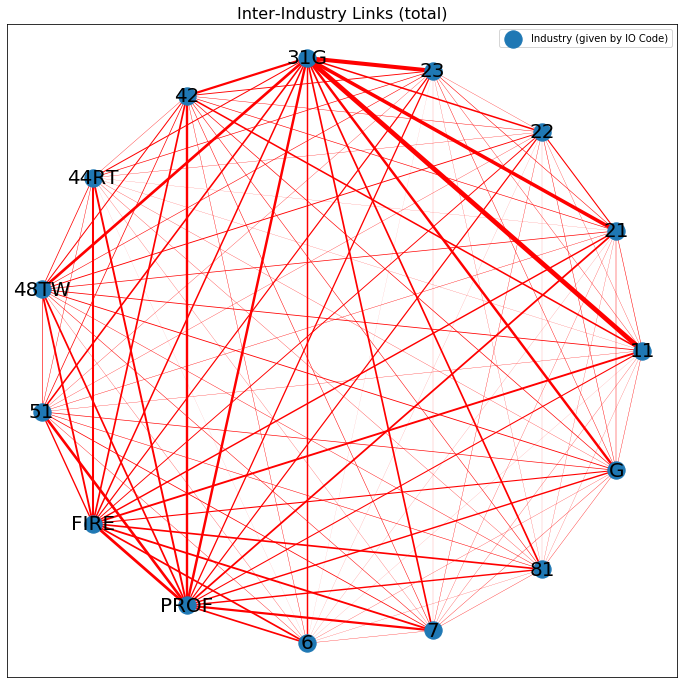

120

In [3]:
#visualization for inter-industry links
#the links represent the sum of links for two industries i.e (a --> b) + (b --> a)
# this is just a way to get a graphical look at how bound two industries are (doesn't say which one depends on which)

trm18 = pd.read_csv("IxI_18.csv", index_col=0)

G = nx.Graph() # this graph is the sum of (a --> b) and (b --> a)
G1 = nx.Graph() # this graph is the difference of (a --> b) and (b --> a)

G.add_nodes_from(list(trm18.index.values)) #sets nodes of industries (given by IO code)
G1.add_nodes_from(list(trm18.index.values)) #sets nodes of industries (given by IO code)

label = ['Agriculture, forestry, fishing, and hunting', 'Mining', 'Utilities', 'Construction',
          'Manufacturing', 'Wholesale Trade', 'Retail trade', 'Transportation and Warehousing', 'Information',
         'Finance, Insurance, Real Estate, Rental, and Leasing', 'Professional and Business services', 
        'Educational Services, Healthcare, and Social Assistance', 'Arts, entertainment, recreation, accomodation and food service',
         'other services except Government', 'Government']

labels = 'Industry (given by IO Code)'

n1 = [] #these two lists (n1 and n2) record the edges (links) to be set i.e there's a link between n1[i] and n2[i]
n2 = []

for i in range(0,len(trm18)):
    for j in range(i,len(trm18)):
        G.add_edge(trm18.index.values[i], trm18.index.values[j]) # add weight? can probably do further analysis with it
        G1.add_edge(trm18.index.values[i], trm18.index.values[j]) # add weight? can probably do further analysis with it
        n1.append(trm18.index.values[i]) # only draw 120 links (out of total 225 = 15*15) 
        n2.append(trm18.index.values[j]) # the remaining 105 would just be overlaid (but in opposite dirn.)
        
n1 = np.array(n1)
n2 = np.array(n2)
        
pos = nx.circular_layout(G) #sets layout to be circular

plt.figure(1,figsize=(12,12)) #canvas to draw on

nx.draw_networkx_nodes(G, pos, label=labels) #draw nodes

a = [] # this will be list of sum of links i.e (n1[i] --> n2[i]) + (n2[i] --> n1[i])
b = [] # this will be list of difference of links


for i in range(0,len(n1)):
    a.append(trm18.loc[n1[i],n2[i]] + trm18.loc[n2[i],n1[i]]) # filling list a
    b.append(trm18.loc[n1[i],n2[i]] - trm18.loc[n2[i],n1[i]])
    

a = np.array(a)
b = np.array(b)
#print(a[0], n1[0], n2[0]) this lets you check if sum is correct. gives sum between the two industries given

nx.draw_networkx_edges(G, pos, width = a*10, edge_color='red') # draw links with size = sum of links between nodes

#labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
plt.title("Inter-Industry Links (total)",fontsize=16)
plt.legend()
plt.show()
G.size()


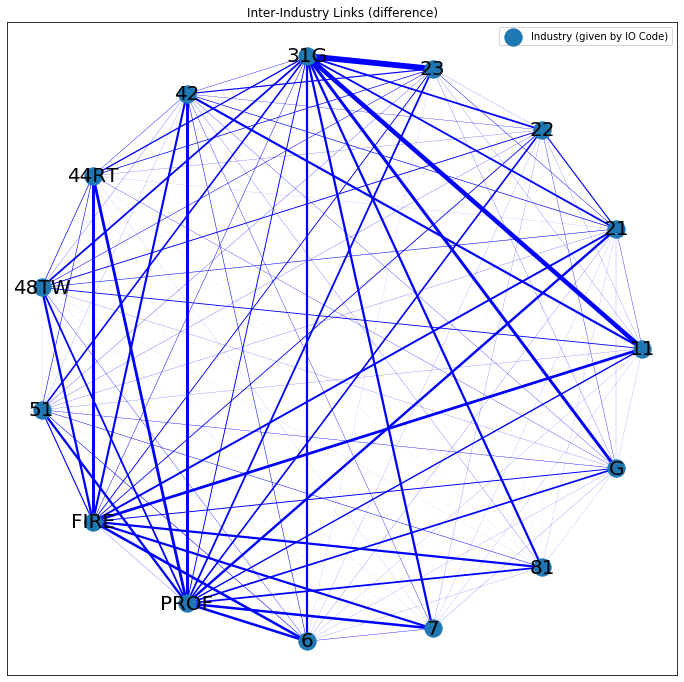

In [17]:
plt.figure(2,figsize=(12,12))
nx.draw_networkx_nodes(G1, pos, label=labels) #draw nodes
nx.draw_networkx_edges(G1, pos, width = abs(b)*15, edge_color='blue') # draw links with size = difference of links between nodes
nx.draw_networkx_labels(G1,pos,font_size=20,font_family='sans-serif')
plt.title("Inter-Industry Links (difference)")
plt.legend()
plt.show()

## Looking at discrepancy in forward link rank and damage score

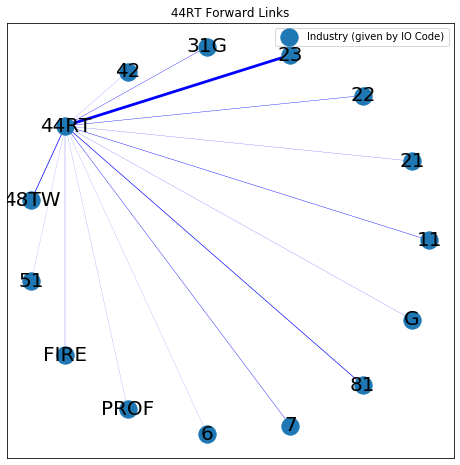

In [35]:
# industry 44RT and 21 became more dangerous than forward link suggests
#this is due to how 'spread out' an industries outputs are. # more dangerous if all eggs in one basket
# total damage score then must be some combination of how 'spread out' you are, and total forward link

G2 = nx.Graph()
G2.add_nodes_from(list(trm18.index.values))

wt = [] # link weights

for j in range(0,len(trm18)):
    G2.add_edge('44RT', trm18.index.values[j])
    wt.append(trm18.loc['44RT',trm18.index.values[j]])
    
wt = np.array(wt)

plt.figure(3,figsize=(8,8))
nx.draw_networkx_nodes(G2, pos, label=labels) #draw nodes
nx.draw_networkx_edges(G2, pos,width=wt*50 ,edge_color='blue') # draw links with size = difference of links between nodes
nx.draw_networkx_labels(G2,pos,font_size=20,font_family='sans-serif')
plt.title("44RT Forward Links")
plt.legend()
plt.show()

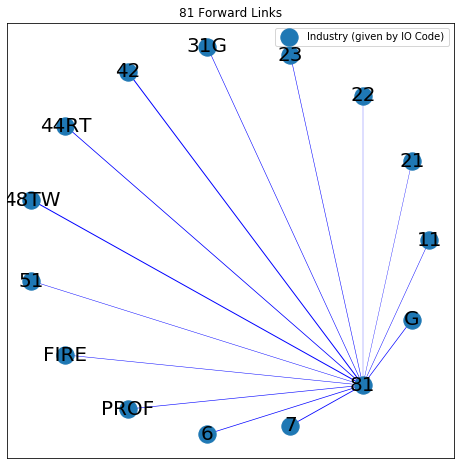

In [36]:
G3 = nx.Graph()
G3.add_nodes_from(list(trm18.index.values))

wt = [] # link weights

for j in range(0,len(trm18)):
    G3.add_edge('81', trm18.index.values[j])
    wt.append(trm18.loc['81',trm18.index.values[j]])
    
wt = np.array(wt)

plt.figure(4,figsize=(8,8))
nx.draw_networkx_nodes(G3, pos, label=labels) #draw nodes
nx.draw_networkx_edges(G3, pos,width=wt*50 ,edge_color='blue') # draw links with size = difference of links between nodes
nx.draw_networkx_labels(G3,pos,font_size=20,font_family='sans-serif')
plt.title("81 Forward Links")
plt.legend()
plt.show()

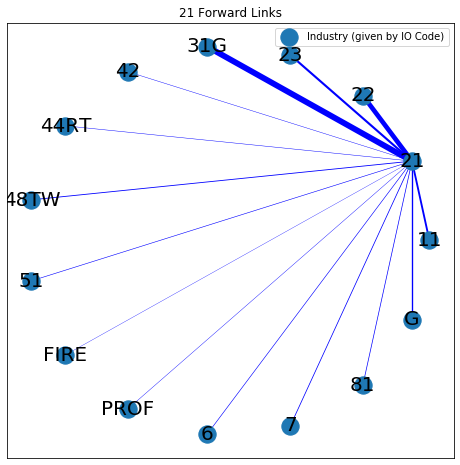

In [37]:
G4 = nx.Graph()
G4.add_nodes_from(list(trm18.index.values))

wt = [] # link weights

for j in range(0,len(trm18)):
    G4.add_edge('21', trm18.index.values[j])
    wt.append(trm18.loc['21',trm18.index.values[j]])
    
wt = np.array(wt)

plt.figure(4,figsize=(8,8))
nx.draw_networkx_nodes(G4, pos, label=labels) #draw nodes
nx.draw_networkx_edges(G4, pos,width=wt*50 ,edge_color='blue') # draw links with size = difference of links between nodes
nx.draw_networkx_labels(G4,pos,font_size=20,font_family='sans-serif')
plt.title("21 Forward Links")
plt.legend()
plt.show()

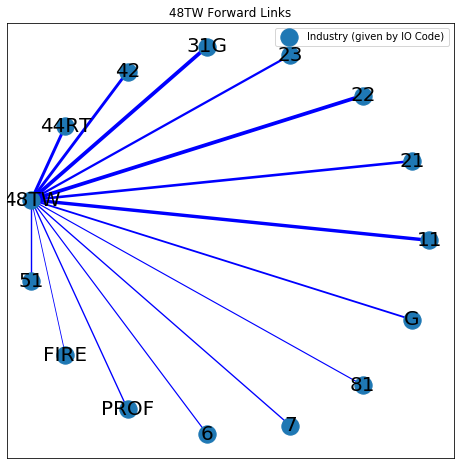

In [39]:
G5 = nx.Graph()
G5.add_nodes_from(list(trm18.index.values))

wt = [] # link weights

for j in range(0,len(trm18)):
    G5.add_edge('48TW', trm18.index.values[j])
    wt.append(trm18.loc['48TW',trm18.index.values[j]])
    
wt = np.array(wt)

plt.figure(4,figsize=(8,8))
nx.draw_networkx_nodes(G5, pos, label=labels) #draw nodes
nx.draw_networkx_edges(G5, pos,width=wt*50 ,edge_color='blue') # draw links with size = difference of links between nodes
nx.draw_networkx_labels(G5,pos,font_size=20,font_family='sans-serif')
plt.title("48TW Forward Links")
plt.legend()
plt.show()

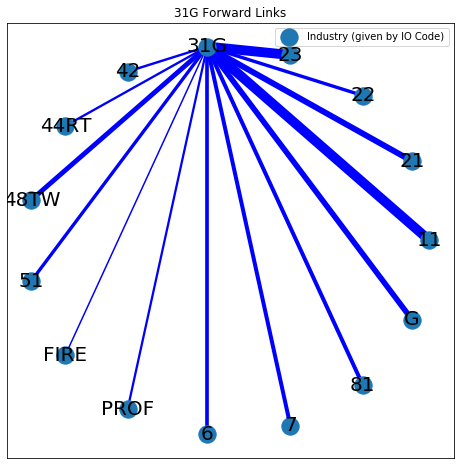

In [41]:
G6 = nx.Graph()
G6.add_nodes_from(list(trm18.index.values))

wt = [] # link weights

for j in range(0,len(trm18)):
    G6.add_edge('31G', trm18.index.values[j])
    wt.append(trm18.loc['31G',trm18.index.values[j]])
    
wt = np.array(wt)

plt.figure(4,figsize=(8,8))
nx.draw_networkx_nodes(G6, pos, label=labels) #draw nodes
nx.draw_networkx_edges(G6, pos,width=wt*25 ,edge_color='blue') # draw links with size = difference of links between nodes
nx.draw_networkx_labels(G6,pos,font_size=20,font_family='sans-serif')
plt.title("31G Forward Links")
plt.legend()
plt.show()

In [5]:
print(trm18.index.values)

['11' '21' '22' '23' '31G' '42' '44RT' '48TW' '51' 'FIRE' 'PROF' '6' '7'
 '81' 'G']


In [15]:
print(trm18.iloc[9,13])
print(len(trm18))

0.15798220000000002
15


In [121]:
for i in range(0,len(trm18)):
    for j in range(i,len(trm18)):
        a = trm18.iloc[j,i]+trm18.iloc[i,j]
        print(a)

2.5630537999999996
0.05074939999999999
0.0262029
0.0356401
0.47493549999999995
0.15617999999999999
0.0161147
0.0793774
0.0273956
0.19049169999999999
0.105916
0.0090872
0.024499100000000003
0.0187388
0.0368529
2.2366886000000004
0.1098229
0.0546248
0.35340930000000004
0.061207300000000006
0.012824599999999999
0.0687225
0.0370864
0.14298270000000002
0.17733939999999998
0.0126059
0.023822
0.0208652
0.0445942
2.0844306
0.028635999999999995
0.15251240000000002
0.0424154
0.028593300000000002
0.0896968
0.0289514
0.09274179999999999
0.1211098
0.010277000000000001
0.032313499999999995
0.0133015
0.043592399999999996
2.0091518
0.40426940000000006
0.0898295
0.06460450000000001
0.056243299999999996
0.0287124
0.12006510000000001
0.1290983
0.0061722999999999995
0.0145242
0.0190794
0.04276640000000001
3.2086952
0.2190762
0.1005809
0.2685354
0.1597487
0.1507739
0.2449977
0.1466787
0.16949910000000004
0.17048739999999998
0.247664
2.0866694
0.0327865
0.10102149999999999
0.07087979999999999
0.1700801
0.23